In [18]:
# initialization
import numpy as np
from qiskit import QuantumCircuit
from ipynb.fs.full.quantum_helpers import q_plot_histogram, list_backends

n = 3 # number of qubits used to represent s
s = '011'   # the hidden binary string

In [19]:
# We need a circuit with n qubits, plus one auxiliary qubit
# Also need n classical bits to write the output to
bv_circuit = QuantumCircuit(n+1, n)

# put auxiliary in state |->
bv_circuit.h(n)
bv_circuit.z(n)

# Apply Hadamard gates before querying the oracle
for i in range(n):
    bv_circuit.h(i)
    
# Apply barrier 
bv_circuit.barrier()

# Apply the inner-product oracle
s = s[::-1] # reverse s to fit qiskit's qubit ordering
for q in range(n):
    if s[q] == '0':
        bv_circuit.i(q)
    else:
        bv_circuit.cx(q, n)
        
# Apply barrier 
bv_circuit.barrier()

#Apply Hadamard gates after querying the oracle
for i in range(n):
    bv_circuit.h(i)

# Measurement
for i in range(n):
    bv_circuit.measure(i, i)

bv_circuit.draw()

┌───┐      ░                 ░ ┌───┐┌─┐      
q_0: ┤ H ├──────░───■─────────────░─┤ H ├┤M├──────
     ├───┤      ░   │             ░ ├───┤└╥┘┌─┐   
q_1: ┤ H ├──────░───┼─────────■───░─┤ H ├─╫─┤M├───
     ├───┤      ░   │  ┌───┐  │   ░ ├───┤ ║ └╥┘┌─┐
q_2: ┤ H ├──────░───┼──┤ I ├──┼───░─┤ H ├─╫──╫─┤M├
     ├───┤┌───┐ ░ ┌─┴─┐└───┘┌─┴─┐ ░ └───┘ ║  ║ └╥┘
q_3: ┤ H ├┤ Z ├─░─┤ X ├─────┤ X ├─░───────╫──╫──╫─
     └───┘└───┘ ░ └───┘     └───┘ ░       ║  ║  ║ 
c: 3/═════════════════════════════════════╩══╩══╩═
                                          0  1  2

In [20]:
list_backends()

ibmq_qasm_simulator: 2 jobs, 32 qubits
ibmq_lima: 72 jobs, 5 qubits
ibmq_belem: 101 jobs, 5 qubits
ibmq_quito: 66 jobs, 5 qubits
simulator_statevector: 3 jobs, 32 qubits
simulator_mps: 2 jobs, 100 qubits
simulator_extended_stabilizer: 2 jobs, 63 qubits
simulator_stabilizer: 2 jobs, 5000 qubits
ibmq_jakarta: 44 jobs, 7 qubits
ibmq_manila: 89 jobs, 5 qubits
ibm_lagos: 34 jobs, 7 qubits
ibm_nairobi: 54 jobs, 7 qubits
ibm_perth: 63 jobs, 7 qubits
ibm_oslo: 83 jobs, 7 qubits


Backend: ibm_lagos
Job ID is cg3p8bfvd9s2avom45sg
Job status is JobStatus.DONE
Job result is SamplerResult(quasi_dists=[{0: 0.015625, 1: 0.0205078125, 2: 0.015625, 3: 0.9365234375, 4: 0.0009765625, 7: 0.0107421875}], metadata=[{'header_metadata': {}, 'shots': 1024}])


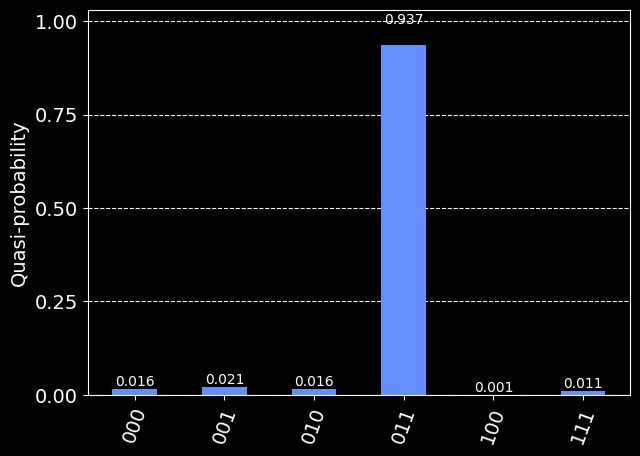

In [21]:
q_plot_histogram(bv_circuit, "ibmq_qasm_simulator")